In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = pd.read_csv('loan_approval_dataset.csv')

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
data.columns = data.columns.str.strip()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
data.describe().style.background_gradient(cmap= 'Greens')

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000
mean,2135.000000,2.498712,5059123.916608,15133450.456781,10.900445,599.936051,7472616.537831,4973155.305692,15126305.926446,4976692.433825
std,1232.498479,1.695910,2806839.831818,9043362.984843,5.709187,172.430401,6503636.587664,4388966.089638,9103753.665256,3250185.305696
min,1.000000,0.000000,200000.000000,300000.000000,2.000000,300.000000,-100000.000000,0.000000,300000.000000,0.000000
25%,1068.000000,1.000000,2700000.000000,7700000.000000,6.000000,453.000000,2200000.000000,1300000.000000,7500000.000000,2300000.000000
50%,2135.000000,3.000000,5100000.000000,14500000.000000,10.000000,600.000000,5600000.000000,3700000.000000,14600000.000000,4600000.000000
75%,3202.000000,4.000000,7500000.000000,21500000.000000,16.000000,748.000000,11300000.000000,7600000.000000,21700000.000000,7100000.000000
max,4269.000000,5.000000,9900000.000000,39500000.000000,20.000000,900.000000,29100000.000000,19400000.000000,39200000.000000,14700000.000000


In [8]:
data.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [9]:
data.describe(include = 'object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [10]:
numeric_column = data.select_dtypes(include = 'number')

In [11]:
numeric_column.drop('loan_id' , axis =1 , inplace = True)

In [12]:
# for i in numeric_column:
#     sns.boxplot(data = numeric_column , x = i , color = 'green')
#     plt.title(f'Boxplot of : {i}' , fontsize = 14 )
#     plt.xlabel(i)
#     plt.ylabel('Values')
#     plt.tight_layout()
#     plt.show()

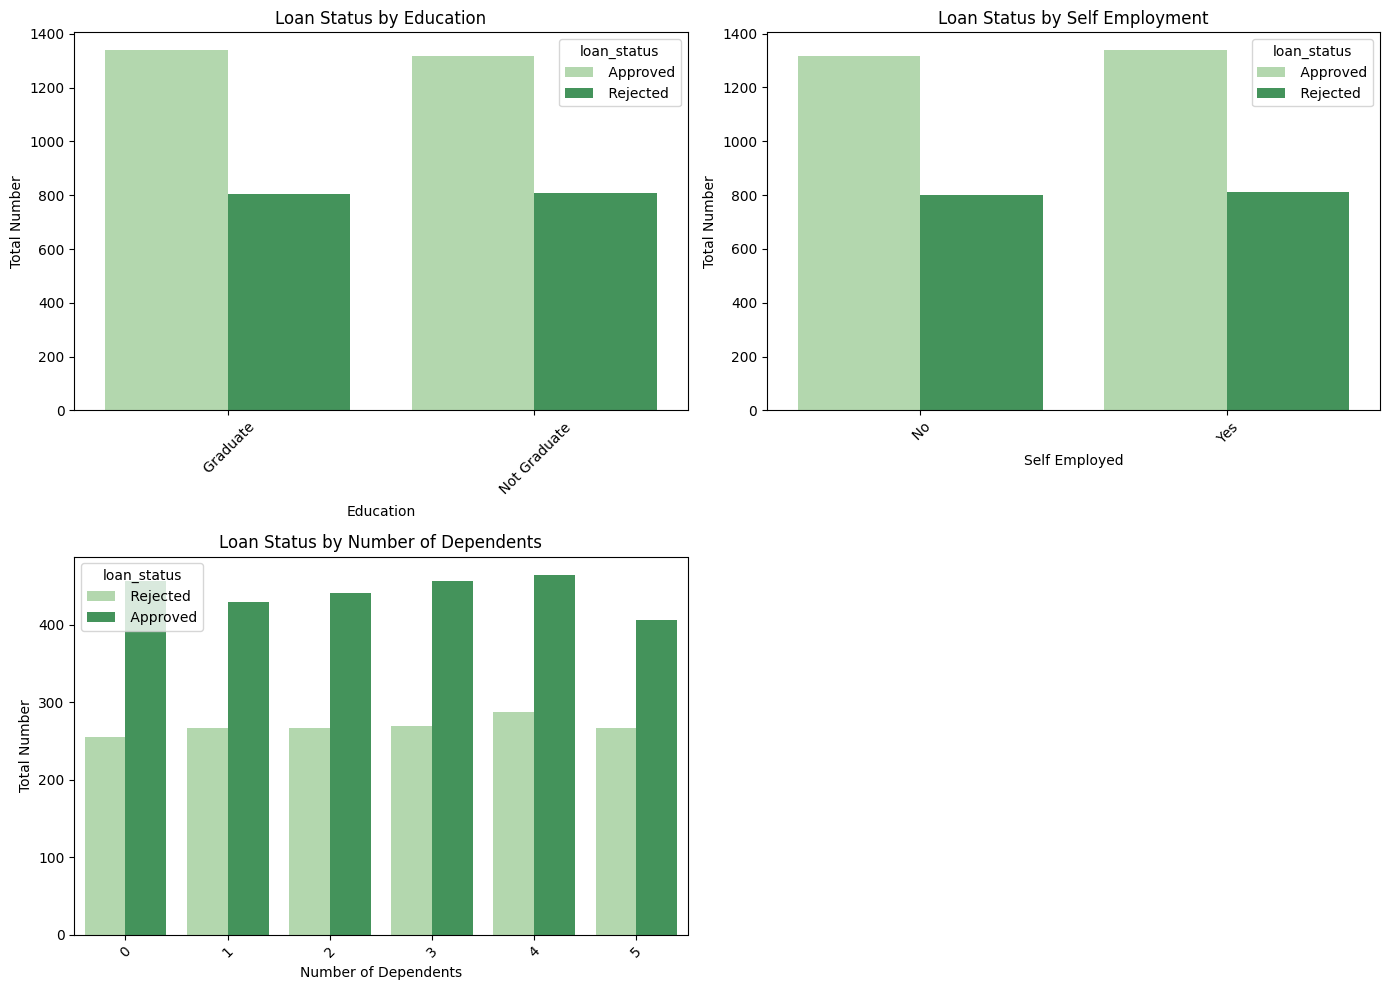

In [13]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  
axes = axes.flatten() 

# Plot 1: Education
sns.countplot(data=data, x='education', hue='loan_status', palette='Greens', ax=axes[0])
axes[0].set_title('Loan Status by Education')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Total Number')
axes[0].tick_params(axis='x', rotation=45)


sns.countplot(data=data, x='self_employed', hue='loan_status', palette='Greens', ax=axes[1])
axes[1].set_title('Loan Status by Self Employment')
axes[1].set_xlabel('Self Employed')
axes[1].set_ylabel('Total Number')
axes[1].tick_params(axis='x', rotation=45)


sns.countplot(data=data, x='no_of_dependents', hue='loan_status', palette='Greens', ax=axes[2])
axes[2].set_title('Loan Status by Number of Dependents')
axes[2].set_xlabel('Number of Dependents')
axes[2].set_ylabel('Total Number')
axes[2].tick_params(axis='x', rotation=45)


fig.delaxes(axes[3])

plt.tight_layout()
plt.show()


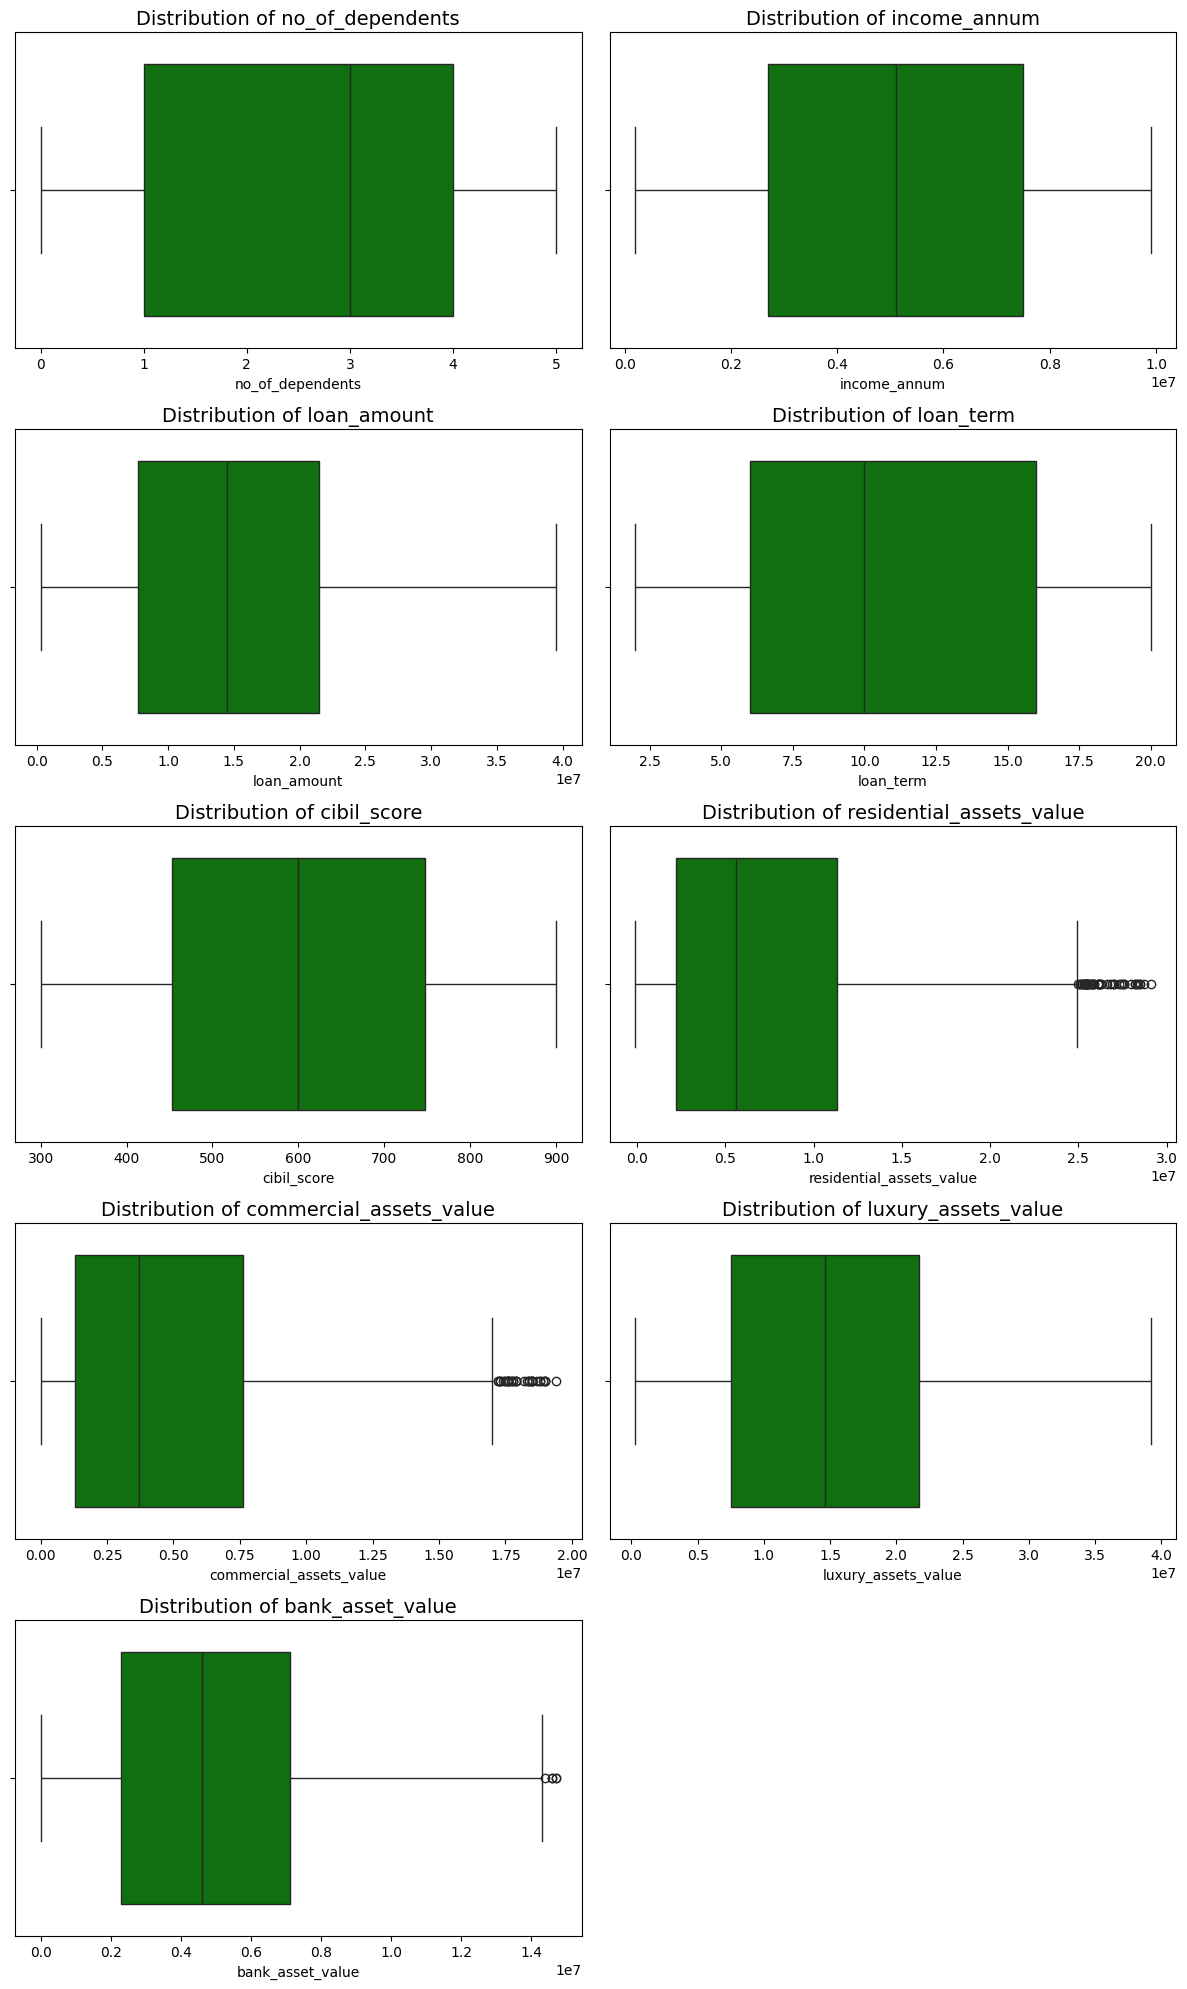

In [14]:
cols = numeric_column.select_dtypes(include='number').columns
n = len(cols)

fig, axes = plt.subplots(math.ceil(n / 2), 2, figsize=(12, 4 * math.ceil(n / 2)))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.boxplot(data=numeric_column, x=col, color='green', ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=14)

# Remove unused axes
for ax in axes[len(cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

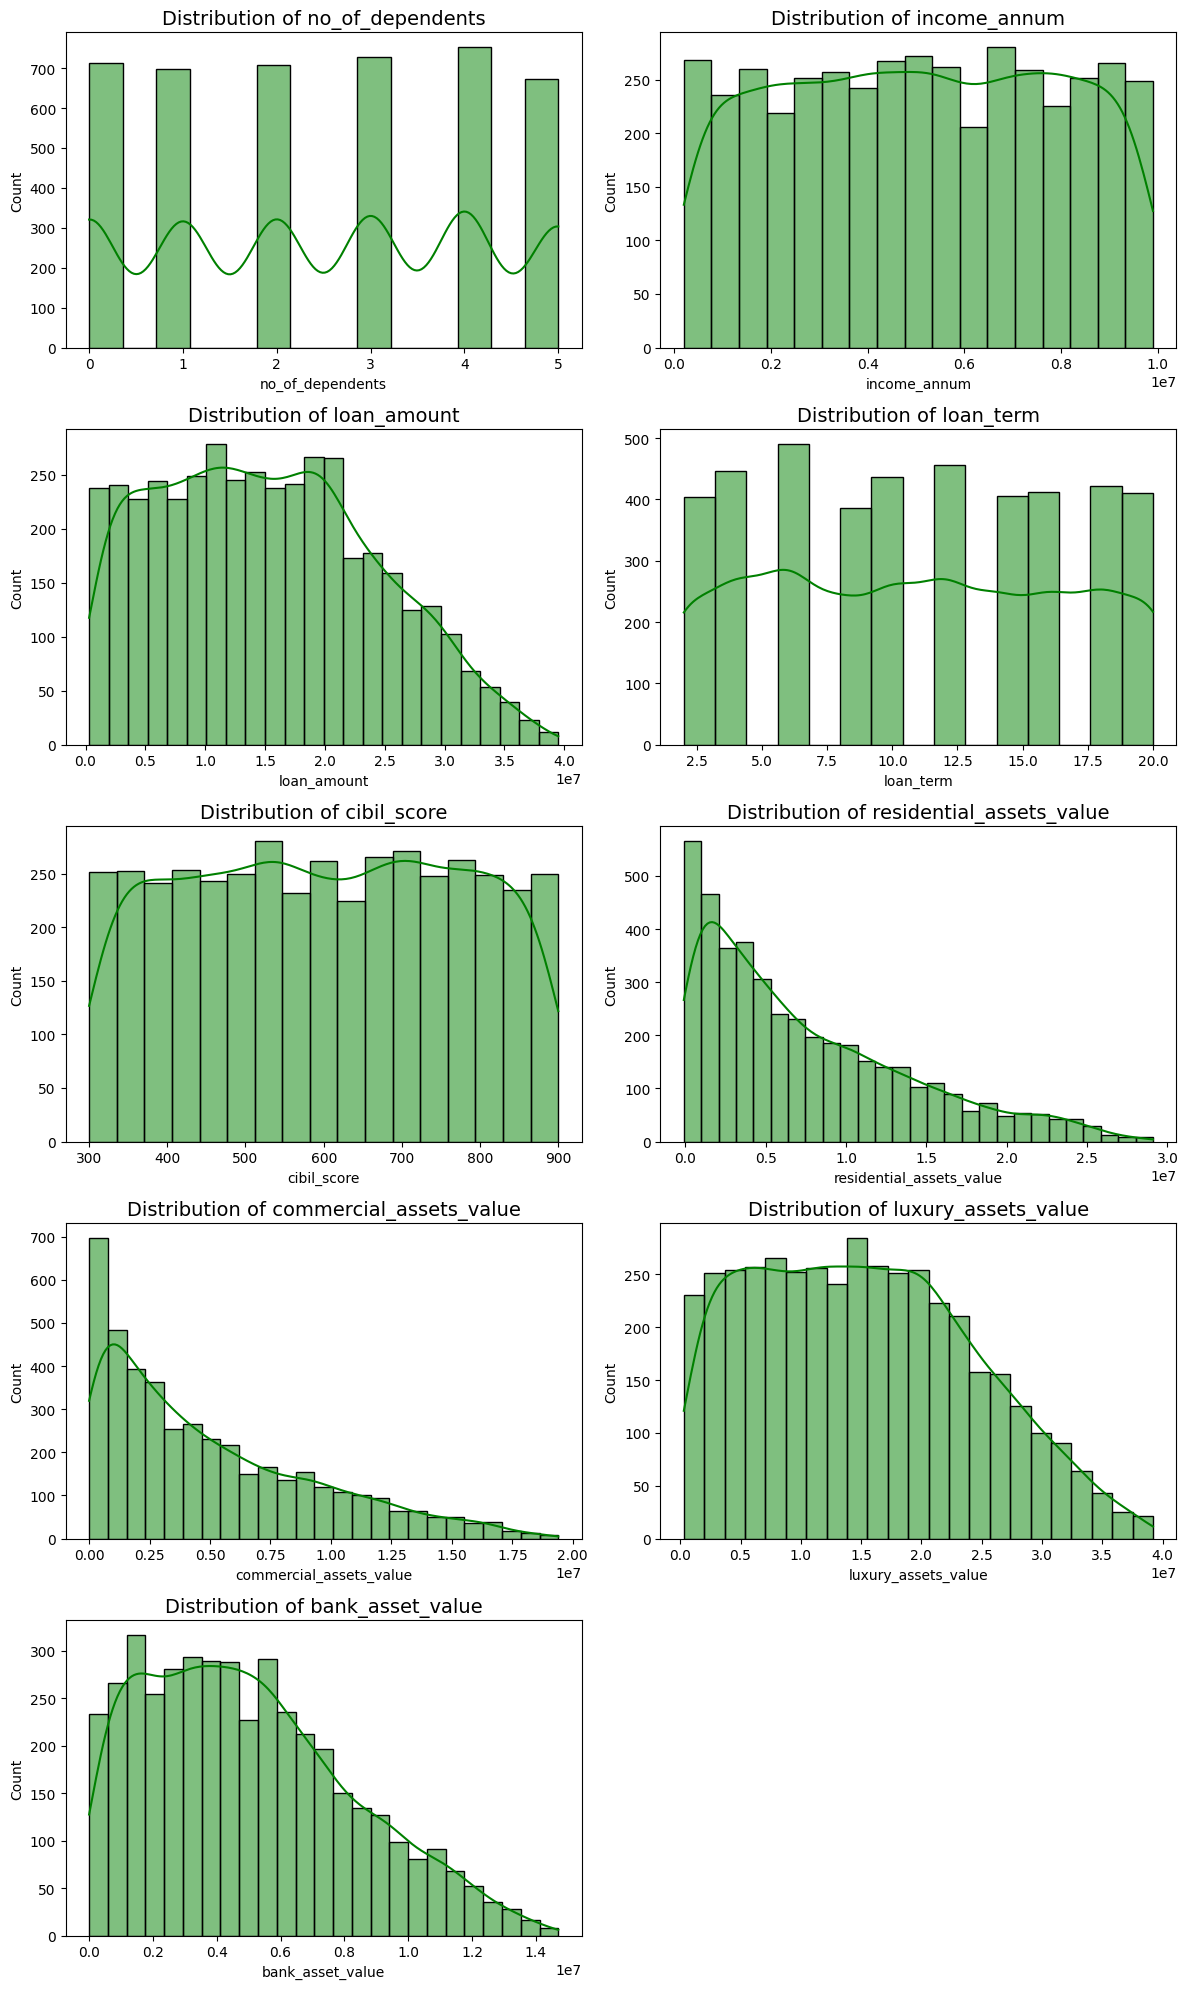

In [15]:
cols = numeric_column.select_dtypes(include='number').columns
n = len(cols)

fig, axes = plt.subplots(math.ceil(n / 2), 2, figsize=(12, 4 * math.ceil(n / 2)))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.histplot(data=numeric_column, x=col, color='green', ax=ax, kde = True)
    ax.set_title(f'Distribution of {col}', fontsize=14)


for ax in axes[len(cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [16]:
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    return outliers




In [17]:
for col in [ 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']:
    outliers = detect_outliers(data, col)
    print(f"\nOutliers in {col}:\n{outliers}")



Outliers in residential_assets_value:
82      25500000
98      25900000
123     26800000
228     25500000
262     25600000
693     25400000
714     28300000
781     26300000
892     27600000
905     28700000
919     25300000
924     25800000
953     25500000
956     25300000
987     28200000
997     25200000
1002    25800000
1397    25700000
1419    25500000
1468    27000000
1591    28500000
1625    26300000
1965    28400000
1997    27000000
2185    25900000
2318    28500000
2384    26600000
2412    26200000
2586    28000000
2715    25800000
2818    25500000
2828    26900000
2922    25200000
2927    27600000
2930    25300000
2940    26100000
3119    29100000
3157    25400000
3234    28200000
3310    25100000
3498    25600000
3631    25400000
3763    26100000
3782    27500000
3860    25000000
3868    25500000
3872    25400000
3880    26200000
4027    25100000
4042    27400000
4074    27300000
4237    26200000
Name: residential_assets_value, dtype: int64

Outliers in commercial_assets_v

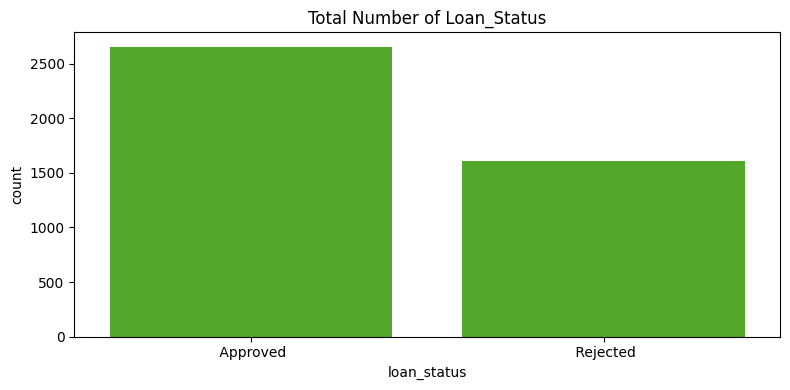

In [18]:
plt.figure(figsize = (8,4))
sns.countplot(data = data , x = 'loan_status', color = '#4CBB17')
plt.xlabel('loan_status')
plt.ylabel('count')
plt.title('Total Number of Loan_Status')

plt.tight_layout()
plt.show()

In [19]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [20]:
loan_status = {
    ' Approved' : 0,
    ' Rejected': 1
}


In [21]:
data['loan_status'] = data['loan_status'].map(loan_status)

In [22]:
data['loan_status'].unique()

array([0, 1], dtype=int64)

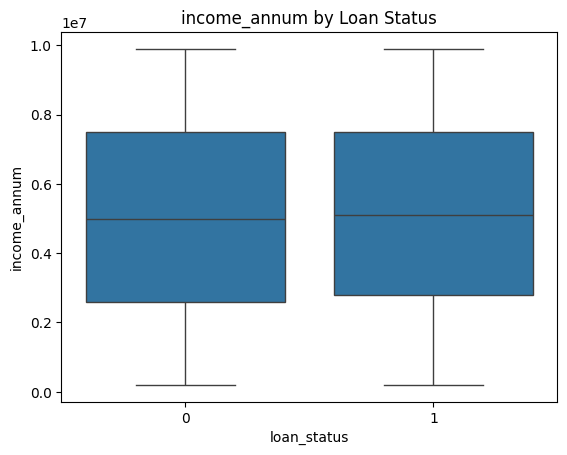

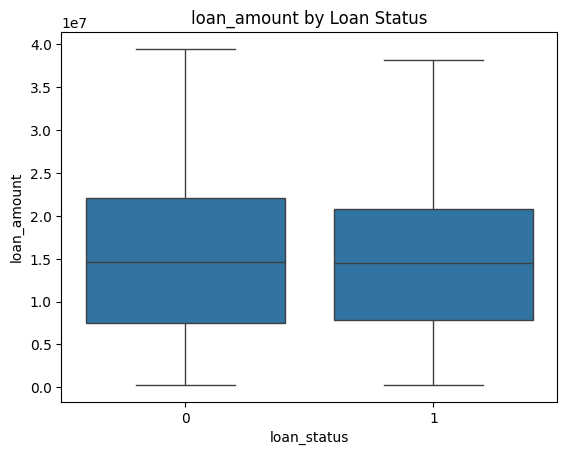

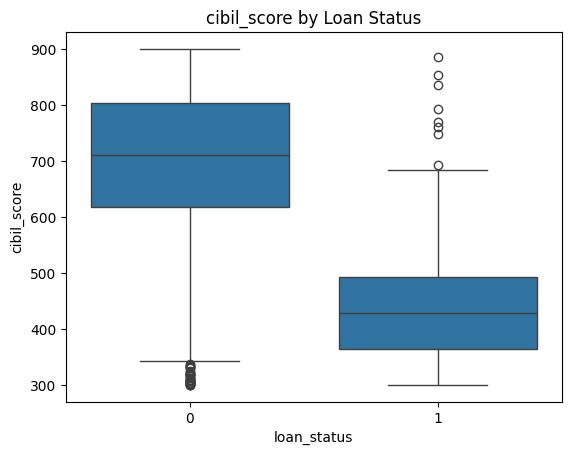

In [23]:
numerical_cols = ['income_annum', 'loan_amount', 'cibil_score']

for col in numerical_cols:
    sns.boxplot(data=data, x='loan_status', y=col)
    plt.title(f'{col} by Loan Status')
    plt.show()


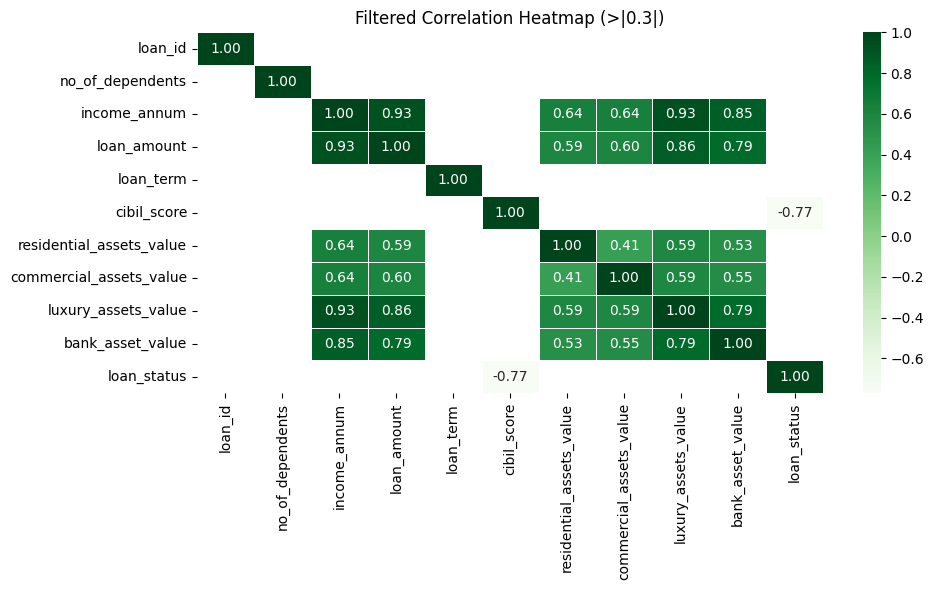

In [24]:
numeric_cols = data.select_dtypes(include = 'number')
corr = numeric_cols.corr()
filtered_corr = corr.mask((corr >= -0.3) & (corr <= 0.3))

plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr, annot=True, cmap='Greens', linewidths=0.5, fmt='.2f')
plt.title('Filtered Correlation Heatmap (>|0.3|)')
plt.tight_layout()
plt.show()

CIBIL score is an independent, highly predictive feature. It has a direct impact on loan approval, but it doesn’t depend on other features like income or assets — at least not linearly.

- Features like income_annum, bank_asset_value, luxury_assets_value represent financial capacity.

- But CIBIL score represents trustworthiness, not how much money someone has now.

- So it’s not surprising it doesn't correlate with income or assets.

Positive correlation with loan_status = 1 (Rejected)

So higher feature value → higher chance of loan_status = 1 = Rejected

Negative correlation → as feature increases, loan_status decreases toward 0 = Approved

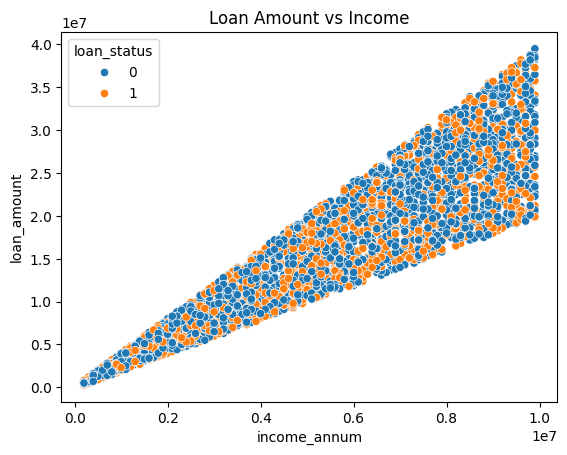

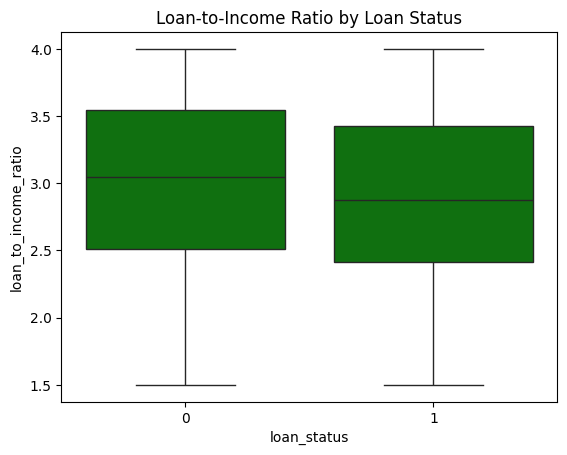

In [25]:
sns.scatterplot(data=data, x='income_annum', y='loan_amount', hue='loan_status')
plt.title('Loan Amount vs Income')
plt.show()

data['loan_to_income_ratio'] = data['loan_amount'] / data['income_annum']
sns.boxplot(data=data, x='loan_status', y='loan_to_income_ratio' , color = 'green')
plt.title('Loan-to-Income Ratio by Loan Status')
plt.show()


Loan Amount and Income_Annum are dependently on each other . The more Income lead to increase Loan Ammount.

In [26]:
data['loan_amount'].mean()

15133450.456781447

In [27]:
data['income_annum'].mean()

5059123.9166081045

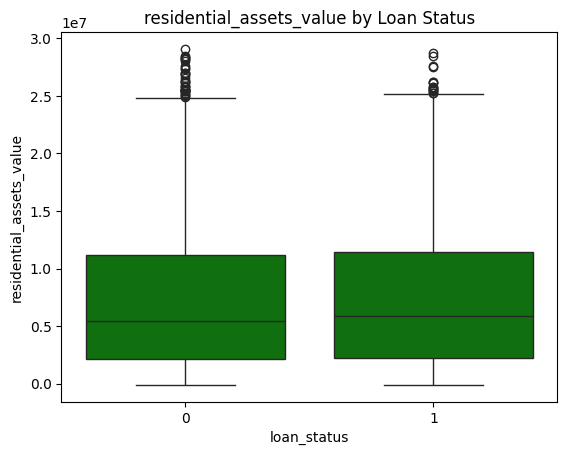

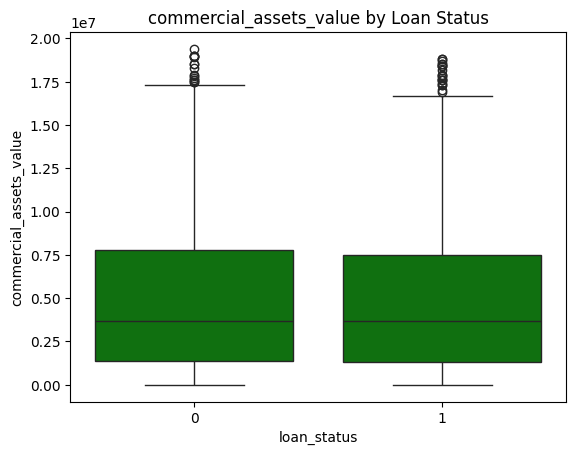

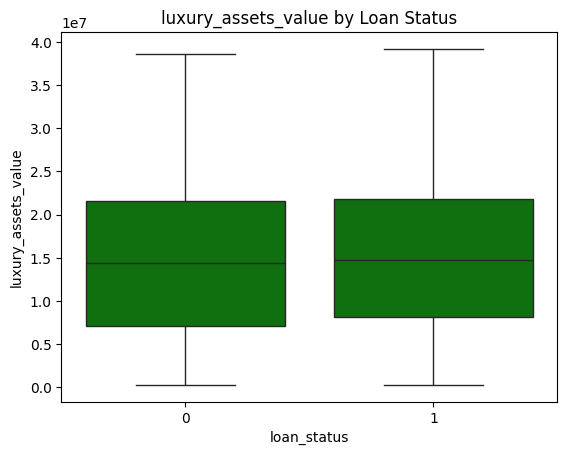

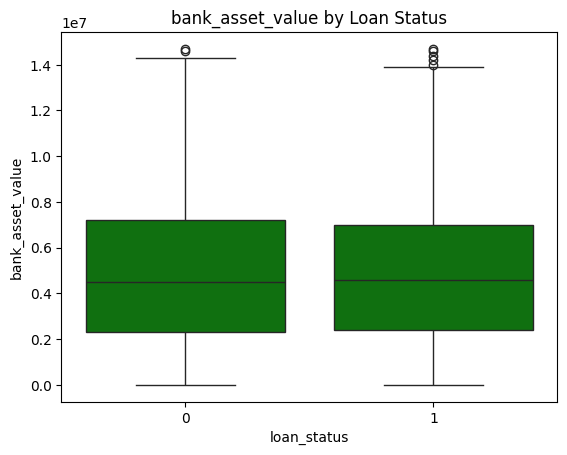

In [28]:
asset_cols = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

for col in asset_cols:
    sns.boxplot(data=data, x='loan_status', y=col , color = 'green')
    plt.title(f'{col} by Loan Status')
    plt.show()


In [29]:
grouped = data.groupby('loan_status')[['cibil_score', 'income_annum']].mean()
print(grouped)


             cibil_score  income_annum
loan_status                           
0             703.461973  5.025904e+06
1             429.468072  5.113825e+06
